In [27]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [28]:
airline_county_df = pd.read_csv('dataset/airline_county_gdf.csv')

In [29]:
import shapely.wkt
from shapely.geometry import Point
points  = [Point(x, y) for x, y in zip(airline_county_df['LONGITUDE'], airline_county_df['LATITUDE'])]
# Convert the radius from miles to degrees
# 1 degree = 69.172 miles
radius = 40 / 69.172 
circles = [Point(p.x, p.y).buffer(radius) for p in points]
airline_gdf = gpd.GeoDataFrame(airline_county_df, geometry=circles)
airline_gdf.crs = {'init': 'epsg:4326'}
airline_gdf

/Users/bianhaoji/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,ORIGIN_AIRPORT_ID,YEAR,WEEK,CANCELLED,COUNT_FLIGHTS,WEATHER_CANCELLED,NAS_CANCELLED,SEC_CANCELLED,CARRIER_CANCELLED,Description,...,STATE,COUNTRY,LATITUDE,LONGITUDE,geometry,index_right,STATEFP,COUNTYFP,NAME,COUNTY_SHAPE
0,10140,2018,1,1,362,1,0,0,0,"Albuquerque, NM: Albuquerque International Sun...",...,NM,USA,35.040222,-106.609194,"POLYGON ((-106.03093 35.04022, -106.03371 34.9...",2289,35,1,Bernalillo,"POLYGON ((-107.197244 35.219459, -106.962038 3..."
1,10140,2018,2,1,269,1,0,0,0,"Albuquerque, NM: Albuquerque International Sun...",...,NM,USA,35.040222,-106.609194,"POLYGON ((-106.03093 35.04022, -106.03371 34.9...",2289,35,1,Bernalillo,"POLYGON ((-107.197244 35.219459, -106.962038 3..."
2,10140,2018,3,5,270,3,0,0,2,"Albuquerque, NM: Albuquerque International Sun...",...,NM,USA,35.040222,-106.609194,"POLYGON ((-106.03093 35.04022, -106.03371 34.9...",2289,35,1,Bernalillo,"POLYGON ((-107.197244 35.219459, -106.962038 3..."
3,10140,2018,4,0,270,0,0,0,0,"Albuquerque, NM: Albuquerque International Sun...",...,NM,USA,35.040222,-106.609194,"POLYGON ((-106.03093 35.04022, -106.03371 34.9...",2289,35,1,Bernalillo,"POLYGON ((-107.197244 35.219459, -106.962038 3..."
4,10140,2018,5,0,266,0,0,0,0,"Albuquerque, NM: Albuquerque International Sun...",...,NM,USA,35.040222,-106.609194,"POLYGON ((-106.03093 35.04022, -106.03371 34.9...",2289,35,1,Bernalillo,"POLYGON ((-107.197244 35.219459, -106.962038 3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21177,15624,2022,27,2,216,0,0,0,2,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",...,FL,USA,30.483250,-86.525400,"POLYGON ((-85.94713 30.48325, -85.94992 30.426...",52,12,91,Okaloosa,"POLYGON ((-86.792429 30.685143999999998, -86.7..."
21178,15624,2022,28,5,210,1,0,0,4,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",...,FL,USA,30.483250,-86.525400,"POLYGON ((-85.94713 30.48325, -85.94992 30.426...",52,12,91,Okaloosa,"POLYGON ((-86.792429 30.685143999999998, -86.7..."
21179,15624,2022,29,5,209,2,0,0,3,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",...,FL,USA,30.483250,-86.525400,"POLYGON ((-85.94713 30.48325, -85.94992 30.426...",52,12,91,Okaloosa,"POLYGON ((-86.792429 30.685143999999998, -86.7..."
21180,15624,2022,30,3,206,1,0,1,1,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",...,FL,USA,30.483250,-86.525400,"POLYGON ((-85.94713 30.48325, -85.94992 30.426...",52,12,91,Okaloosa,"POLYGON ((-86.792429 30.685143999999998, -86.7..."


In [30]:
airline_county_weekly_gdf = airline_gdf.groupby(['YEAR', 'WEEK']).agg(
    {'COUNT_FLIGHTS' : 'sum'}
)
airline_county_weekly_gdf = airline_county_weekly_gdf.reset_index()

In [31]:
airline_county_weekly_gdf

,YEAR,WEEK,COUNT_FLIGHTS
0,2018,1,94642
1,2018,2,80181
2,2018,3,80752
3,2018,4,80880
4,2018,5,79960
...,...,...,...
233,2022,27,88942
234,2022,28,90775
235,2022,29,90714
236,2022,30,90722


Firstly we look into the total numbers of flights weekly from 2018 - 2022. We can notice that from 2018 to 2019 and the begining of 2020, the numbers of flights were steady around 500k a week. But after 2020, there is a great drop in gross number of flights and reach the bottom at the middle 2020. Then the flight count gradually recover from 2020 to 2022. The slope after 2022 is due to no sufficient data.

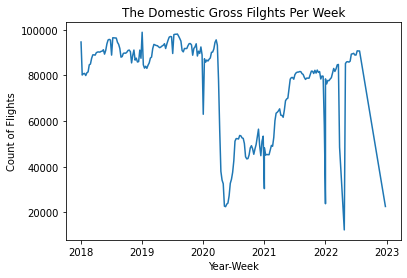

In [34]:
import matplotlib.pyplot as plt
# plt.plot(airline_county_weekly_gdf.index, airline_county_weekly_gdf['COUNT_FLIGHTS'], '-o')
plt.plot(airline_county_weekly_gdf['YEAR'] + (airline_county_weekly_gdf['WEEK'] - 1) / 52, airline_county_weekly_gdf['COUNT_FLIGHTS'])
plt.xlabel('Year-Week')
plt.ylabel('Count of Flights')
plt.title('The Domestic Gross Filghts Per Week')
plt.show()

Then we look into the reason why there is huge drop in the airlines. We found there is huge gap of airlines cancelled within 2020 than other years. We need to exclude the possibility of weather. The weather could also be a reason that would lead to large scale ailines cancellation. However, compared to other years, there were even less weather cancellation in 2020. The main cancellation reason in 2020 is security cancel, which is directly related to the covid. The rest cancellations are not specified so we need to loop deep into it.

<ipython-input-52-ecc82d3f8429>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = airline_gdf.groupby(["YEAR"]).sum()[[ "WEATHER_CANCELLED", "NAS_CANCELLED", "SEC_CANCELLED", "CARRIER_CANCELLED"]]


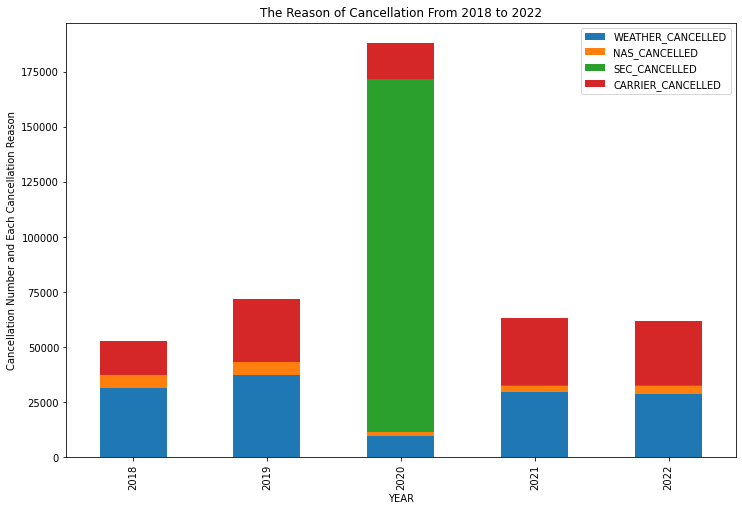

In [52]:
grouped = airline_gdf.groupby(["YEAR"]).sum()[[ "WEATHER_CANCELLED", "NAS_CANCELLED", "SEC_CANCELLED", "CARRIER_CANCELLED"]]

# Plot the data as a bar plot
ax = grouped.plot.bar(stacked=True, figsize=(12, 8))
plt.title("The Reason of Cancellation From 2018 to 2022")
plt.ylabel("Cancellation Number and Each Cancellation Reason")
# Show the plot
plt.show()


<ipython-input-51-96910c4e6961>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = airline_gdf.groupby(["YEAR"]).sum()[["COUNT_FLIGHTS","CANCELLED"]]


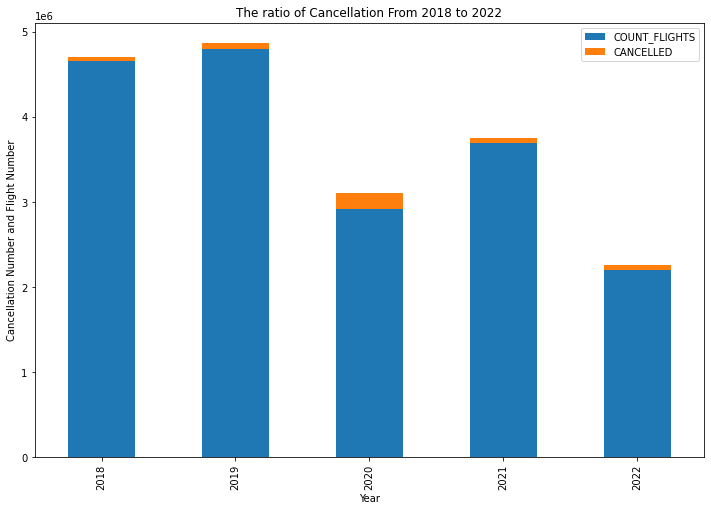

In [51]:
grouped = airline_gdf.groupby(["YEAR"]).sum()[["COUNT_FLIGHTS","CANCELLED"]]

# Plot the data as a bar plot
ax = grouped.plot.bar(stacked=True, figsize=(12, 8))
plt.title("The ratio of Cancellation From 2018 to 2022")
plt.ylabel("Cancellation Number and Flight Number")
plt.xlabel("Year")
# Show the plot
plt.show()


<ipython-input-55-f65f7dabc979>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = airline_gdf.groupby(["YEAR"]).sum()[["COUNT_FLIGHTS","CANCELLED"]]


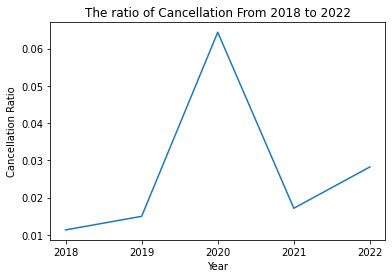

In [55]:
grouped = airline_gdf.groupby(["YEAR"]).sum()[["COUNT_FLIGHTS","CANCELLED"]]
grouped["CANCELLATION_RATIO"] = grouped["CANCELLED"] / grouped["COUNT_FLIGHTS"]

grouped["CANCELLATION_RATIO"] = grouped["CANCELLED"] / grouped["COUNT_FLIGHTS"]

grouped.index = grouped.index.astype(int)

# Plot the line chart
plt.plot(grouped.index, grouped["CANCELLATION_RATIO"])
plt.ylabel("Cancellation Ratio")
plt.xlabel("Year")
plt.title( "The ratio of Cancellation From 2018 to 2022")
plt.xticks(grouped.index.astype(int))
# Show the plot
plt.show()

In [57]:
covid_airline_df = pd.read_csv('dataset/covid_airline.csv')
covid_airline_df

,ORIGIN_AIRPORT_ID,YEAR,WEEK,CANCELLED,COUNT_FLIGHTS,WEATHER_CANCELLED,NAS_CANCELLED,SEC_CANCELLED,CARRIER_CANCELLED,Description,...,percent_below_poverty,fog,rain,snow,thunder,visibility,max_wind_speed,lat,lon,weekly_cases
0,10140,2020,11,7,318,1,2,2,2,"Albuquerque, NM: Albuquerque International Sun...",...,18.7,0.0,3.0,0.0,1.0,9.900000,16.820000,35.051368,-106.670163,10.0
1,10140,2020,12,58,331,4,7,44,3,"Albuquerque, NM: Albuquerque International Sun...",...,18.7,0.0,3.0,0.0,0.0,9.957143,18.900000,35.051368,-106.670163,24.0
2,10140,2020,13,134,330,0,0,127,7,"Albuquerque, NM: Albuquerque International Sun...",...,18.7,0.0,2.0,0.0,0.0,10.000000,21.600000,35.051368,-106.670163,67.0
3,10140,2020,14,177,327,0,0,169,8,"Albuquerque, NM: Albuquerque International Sun...",...,18.7,0.0,1.0,0.0,0.0,10.000000,21.285714,35.051368,-106.670163,145.0
4,10140,2020,15,150,286,0,0,147,3,"Albuquerque, NM: Albuquerque International Sun...",...,18.7,0.0,1.0,0.0,0.0,10.000000,16.157143,35.051368,-106.670163,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,15624,2020,45,0,64,0,0,0,0,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",...,12.0,0.0,0.0,0.0,0.0,10.000000,10.671429,30.691297,-86.591760,517.0
3445,15624,2020,46,2,67,0,0,2,0,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",...,12.0,0.0,2.0,0.0,0.0,9.514286,10.242857,30.691297,-86.591760,553.0
3446,15624,2020,47,0,64,0,0,0,0,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",...,12.0,0.0,0.0,0.0,0.0,9.885714,9.700000,30.691297,-86.591760,708.0
3447,15624,2020,48,3,75,0,0,0,3,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",...,12.0,3.0,5.0,0.0,1.0,8.771429,12.028571,30.691297,-86.591760,542.0


In [61]:
points  = [Point(x, y) for x, y in zip(covid_airline_df['LONGITUDE'], covid_airline_df['LATITUDE'])]
# Convert the radius from miles to degrees
# 1 degree = 69.172 miles
radius = 40 / 69.172 
circles = [Point(p.x, p.y).buffer(radius) for p in points]
covid_airline_gdf = gpd.GeoDataFrame(covid_airline_df, geometry=circles)
covid_airline_gdf.crs = {'init': 'epsg:4326'}
covid_airline_gdf

/Users/bianhaoji/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,ORIGIN_AIRPORT_ID,YEAR,WEEK,CANCELLED,COUNT_FLIGHTS,WEATHER_CANCELLED,NAS_CANCELLED,SEC_CANCELLED,CARRIER_CANCELLED,Description,...,rain,snow,thunder,visibility,max_wind_speed,lat,lon,weekly_cases,cases_rate,death_rate
0,10140,2020,11,7,318,1,2,2,2,"Albuquerque, NM: Albuquerque International Sun...",...,3.0,0.0,1.0,9.900000,16.820000,35.051368,-106.670163,10.0,0.000015,0.000000
1,10140,2020,12,58,331,4,7,44,3,"Albuquerque, NM: Albuquerque International Sun...",...,3.0,0.0,0.0,9.957143,18.900000,35.051368,-106.670163,24.0,0.000050,0.000000
2,10140,2020,13,134,330,0,0,127,7,"Albuquerque, NM: Albuquerque International Sun...",...,2.0,0.0,0.0,10.000000,21.600000,35.051368,-106.670163,67.0,0.000150,0.000001
3,10140,2020,14,177,327,0,0,169,8,"Albuquerque, NM: Albuquerque International Sun...",...,1.0,0.0,0.0,10.000000,21.285714,35.051368,-106.670163,145.0,0.000365,0.000010
4,10140,2020,15,150,286,0,0,147,3,"Albuquerque, NM: Albuquerque International Sun...",...,1.0,0.0,0.0,10.000000,16.157143,35.051368,-106.670163,194.0,0.000652,0.000024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,15624,2020,45,0,64,0,0,0,0,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",...,0.0,0.0,0.0,10.000000,10.671429,30.691297,-86.591760,517.0,0.036063,0.000705
3445,15624,2020,46,2,67,0,0,2,0,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",...,2.0,0.0,0.0,9.514286,10.242857,30.691297,-86.591760,553.0,0.038887,0.000710
3446,15624,2020,47,0,64,0,0,0,0,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",...,0.0,0.0,0.0,9.885714,9.700000,30.691297,-86.591760,708.0,0.042503,0.000741
3447,15624,2020,48,3,75,0,0,0,3,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",...,5.0,0.0,1.0,8.771429,12.028571,30.691297,-86.591760,542.0,0.045271,0.000751


In [63]:
covid_airline_gdf['cases_rate'] = covid_airline_gdf['cases'] / covid_airline_gdf['total_population']
covid_airline_gdf['death_rate'] = covid_airline_gdf['deaths'] / covid_airline_gdf['total_population']
covid_airline_gdf['flights_populations'] = covid_airline_gdf['COUNT_FLIGHTS'] / covid_airline_gdf['total_population']

In [78]:
covid_airline_gdf

,ORIGIN_AIRPORT_ID,YEAR,WEEK,CANCELLED,COUNT_FLIGHTS,WEATHER_CANCELLED,NAS_CANCELLED,SEC_CANCELLED,CARRIER_CANCELLED,Description,...,snow,thunder,visibility,max_wind_speed,lat,lon,weekly_cases,cases_rate,death_rate,flights_populations
0,10140,2020,11,7,318,1,2,2,2,"Albuquerque, NM: Albuquerque International Sun...",...,0.0,1.0,9.900000,16.820000,35.051368,-106.670163,10.0,0.000015,0.000000,0.000471
1,10140,2020,12,58,331,4,7,44,3,"Albuquerque, NM: Albuquerque International Sun...",...,0.0,0.0,9.957143,18.900000,35.051368,-106.670163,24.0,0.000050,0.000000,0.000491
2,10140,2020,13,134,330,0,0,127,7,"Albuquerque, NM: Albuquerque International Sun...",...,0.0,0.0,10.000000,21.600000,35.051368,-106.670163,67.0,0.000150,0.000001,0.000489
3,10140,2020,14,177,327,0,0,169,8,"Albuquerque, NM: Albuquerque International Sun...",...,0.0,0.0,10.000000,21.285714,35.051368,-106.670163,145.0,0.000365,0.000010,0.000485
4,10140,2020,15,150,286,0,0,147,3,"Albuquerque, NM: Albuquerque International Sun...",...,0.0,0.0,10.000000,16.157143,35.051368,-106.670163,194.0,0.000652,0.000024,0.000424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,15624,2020,45,0,64,0,0,0,0,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",...,0.0,0.0,10.000000,10.671429,30.691297,-86.591760,517.0,0.036063,0.000705,0.000327
3445,15624,2020,46,2,67,0,0,2,0,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",...,0.0,0.0,9.514286,10.242857,30.691297,-86.591760,553.0,0.038887,0.000710,0.000342
3446,15624,2020,47,0,64,0,0,0,0,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",...,0.0,0.0,9.885714,9.700000,30.691297,-86.591760,708.0,0.042503,0.000741,0.000327
3447,15624,2020,48,3,75,0,0,0,3,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",...,0.0,1.0,8.771429,12.028571,30.691297,-86.591760,542.0,0.045271,0.000751,0.000383


<ipython-input-79-97d8bca69f3f>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Reds")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


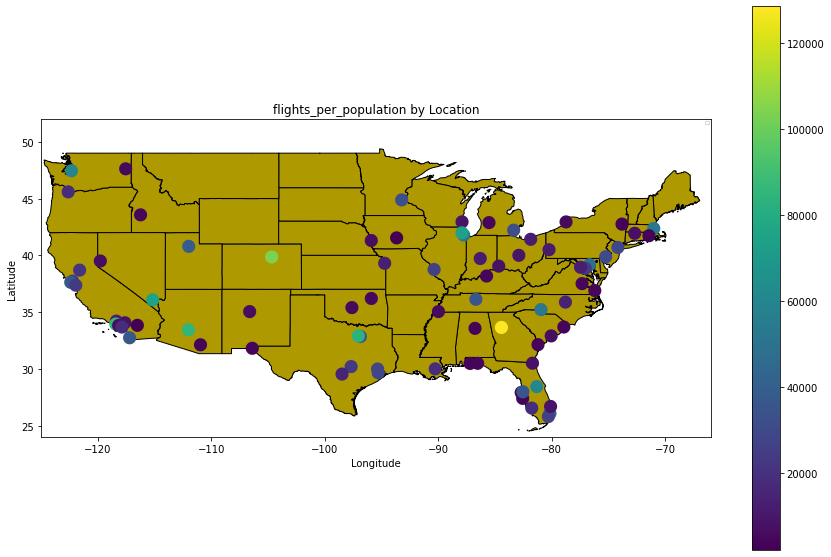

In [79]:
state_borders = gpd.read_file("./dataset/cb_2017_us_state_5m/cb_2017_us_state_5m.shp")

us_mainland = state_borders[state_borders["STUSPS"] != "AK"]
us_mainland = us_mainland.to_crs('epsg:4326')
fig, ax = plt.subplots(figsize=(15, 10))
us_mainland.plot(color="#AF9900", linewidth=1, edgecolor="black", ax=ax)
cmap = plt.cm.get_cmap("Reds")
county_grouped_case_airline = covid_airline_gdf.groupby(['ORIGIN_AIRPORT_ID']).agg(
    {'COUNT_FLIGHTS' : 'sum',
     'cases' : 'max',
     'geometry' : 'first',
     'cases_rate': 'max',
     'total_population' : 'mean',
     'flights_populations' : 'mean'}
).reset_index()
county_grouped_case_airline = gpd.GeoDataFrame(county_grouped_case_airline, geometry='geometry')
county_grouped_case_airline.plot(column="COUNT_FLIGHTS", legend=True, ax = ax)
ax.set_xlim(-125, -66)
ax.set_ylim(24, 52)
# Add title and axis labels
plt.title("Total flights by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(fontsize=4)
# Show the plot
plt.show()

We first look into whole US. Due to the differences in population, the number of flight may vary, so we use the case rate and gross flights per person to do the plot. The airport locations on the map with the colors that represent the total numbers of airlines each airport per person (airlines/total population) within 2020, and do the same to the covid data by coloring using cases rate (cases / total population). We try to find out if there is any relation between covid case and flight number.

<ipython-input-95-8d6c77f22880>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Blues")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


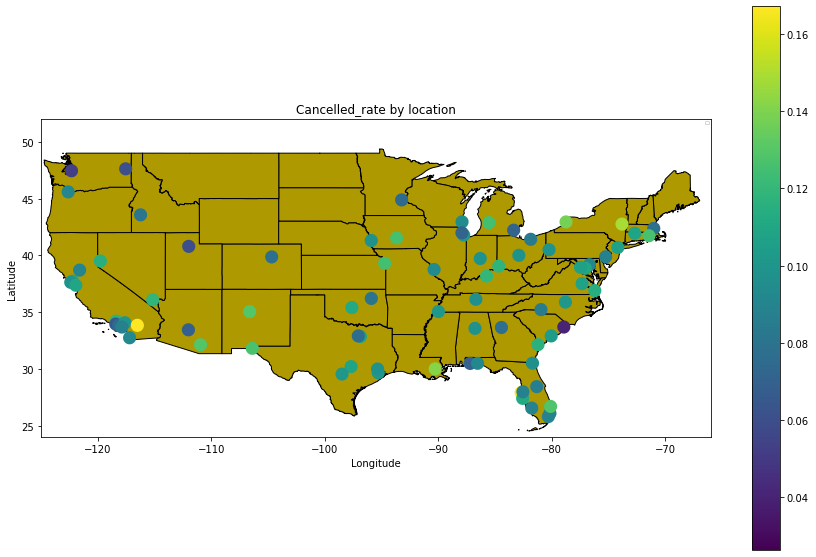

In [95]:

fig, ax = plt.subplots(figsize=(15, 10))
us_mainland.plot(color="#AF9900", linewidth=1, edgecolor="black", ax=ax)
cmap = plt.cm.get_cmap("Blues")
county_grouped_case_airline = covid_airline_gdf.groupby(['ORIGIN_AIRPORT_ID']).agg(
    {'COUNT_FLIGHTS' : 'sum',
     'cases' : 'max',
     'geometry' : 'first',
     'cases_rate': 'max',
     'total_population' : 'mean',
     'flights_populations' : 'mean',
     'CANCELLED' : 'sum',
     }
).reset_index()
# divide COUNT_FLIGHTS by total_population to find the flights per person
county_grouped_case_airline['CANCELLED_rate'] = county_grouped_case_airline['CANCELLED'] / county_grouped_case_airline['COUNT_FLIGHTS']
county_grouped_case_airline = gpd.GeoDataFrame(county_grouped_case_airline, geometry='geometry')
county_grouped_case_airline.plot(column="CANCELLED_rate",legend=True, ax = ax)
ax.set_xlim(-125, -66)
ax.set_ylim(24, 52)
# Add title and axis labels
plt.title("Cancelled_rate by location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(fontsize=4)
# Show the plot
plt.show()

In [96]:
max_index = county_grouped_case_airline["CANCELLED_rate"].idxmax()

# Get the row with the maximum value of the CANCELLED_rate column
max_row = county_grouped_case_airline.loc[max_index]
max_cancelled_rate_id = max_row['ORIGIN_AIRPORT_ID']
max_row

ORIGIN_AIRPORT_ID                                                  14112
COUNT_FLIGHTS                                                       5237
cases                                                              34152
geometry               POLYGON ((-82.10917077637889 27.91076333, -82....
cases_rate                                                      0.036349
total_population                                                939548.0
flights_populations                                             0.000143
CANCELLED                                                            876
CANCELLED_rate                                                  0.167271
Name: 61, dtype: object

<ipython-input-72-ef467613b2af>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Reds")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


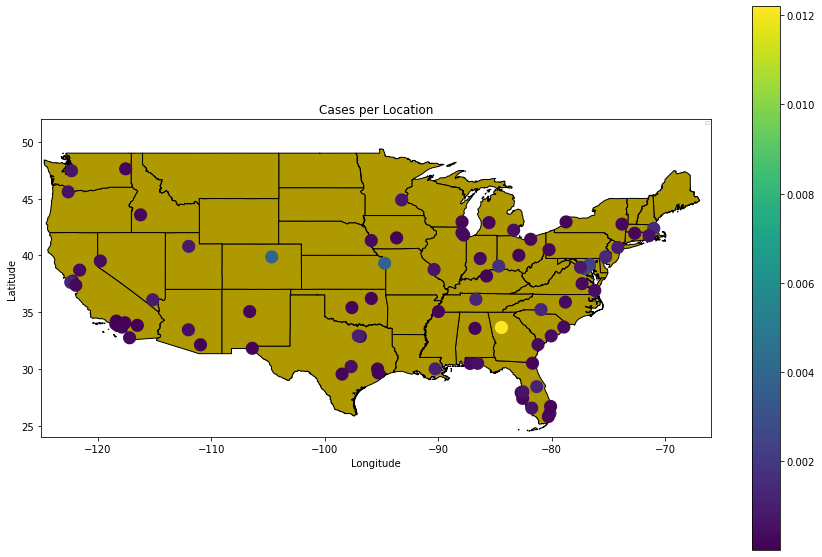

In [72]:
fig, ax = plt.subplots(figsize=(15, 10))
us_mainland.plot(color="#AF9900", linewidth=1, edgecolor="black", ax=ax)
cmap = plt.cm.get_cmap("Reds")
county_grouped_case_airline = covid_airline_gdf.groupby(['ORIGIN_AIRPORT_ID']).agg(
    {'COUNT_FLIGHTS' : 'sum',
     'cases' : 'max',
     'geometry' : 'first',
     'cases_rate': 'max',
     'total_population' : 'mean',
     'flights_populations' : 'mean'}
).reset_index()
county_grouped_case_airline = gpd.GeoDataFrame(county_grouped_case_airline, geometry='geometry')
county_grouped_case_airline.plot(column="flights_populations", legend=True, ax = ax)
ax.set_xlim(-125, -66)
ax.set_ylim(24, 52)
# Add title and axis labels
plt.title("Cases per Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(fontsize=4)
# Show the plot
plt.show()

<ipython-input-65-17951edcbf1a>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Reds")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


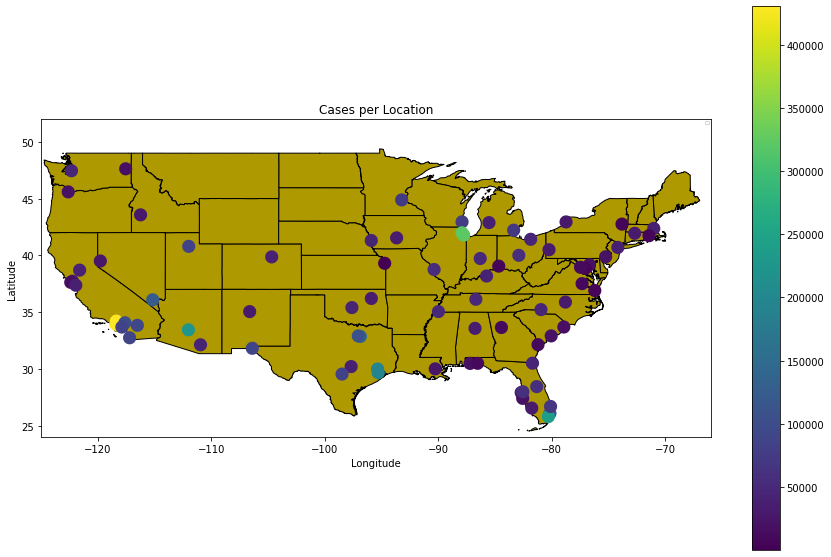

In [65]:
fig, ax = plt.subplots(figsize=(15, 10))
us_mainland.plot(color="#AF9900", linewidth=1, edgecolor="black", ax=ax)
cmap = plt.cm.get_cmap("Reds")
county_grouped_case_airline = covid_airline_gdf.groupby(['ORIGIN_AIRPORT_ID']).agg(
    {'COUNT_FLIGHTS' : 'sum',
     'cases' : 'max',
     'geometry' : 'first',
     'cases_rate': 'max',
     'total_population' : 'mean'}
).reset_index()
county_grouped_case_airline = gpd.GeoDataFrame(county_grouped_case_airline, geometry='geometry')
county_grouped_case_airline.plot(column="cases", legend=True, ax = ax)
ax.set_xlim(-125, -66)
ax.set_ylim(24, 52)
# Add title and axis labels
plt.title("Cases per Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(fontsize=4)
# Show the plot
plt.show()

<ipython-input-73-ace3a6e27599>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Reds")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


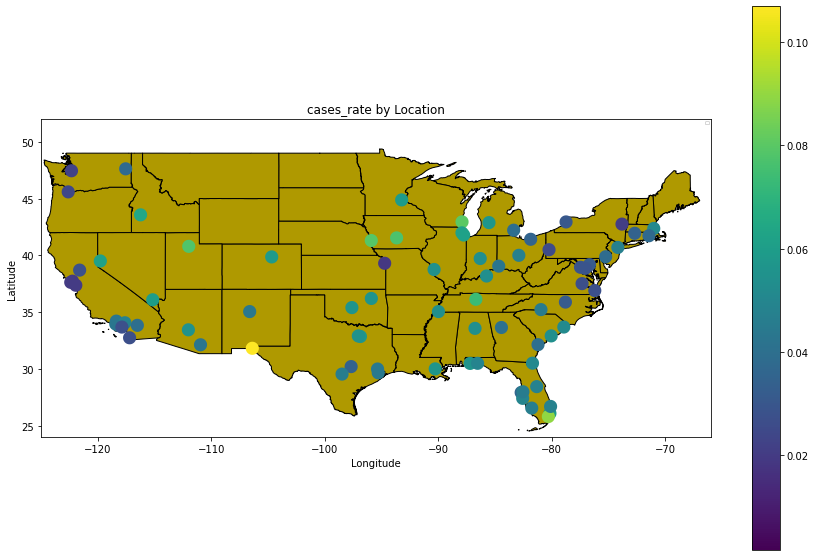

In [73]:
fig, ax = plt.subplots(figsize=(15, 10))
us_mainland.plot(color="#AF9900", linewidth=1, edgecolor="black", ax=ax)
cmap = plt.cm.get_cmap("Reds")
county_grouped_case_airline = covid_airline_gdf.groupby(['ORIGIN_AIRPORT_ID']).agg(
    {'COUNT_FLIGHTS' : 'sum',
     'cases' : 'max',
     'geometry' : 'first',
     'cases_rate': 'max',
     'total_population' : 'mean'}
).reset_index()
county_grouped_case_airline = gpd.GeoDataFrame(county_grouped_case_airline, geometry='geometry')
county_grouped_case_airline.plot(column="cases_rate", legend=True, ax = ax)
ax.set_xlim(-125, -66)
ax.set_ylim(24, 52)
# Add title and axis labels
plt.title("cases_rate by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(fontsize=4)
# Show the plot
plt.show()

Compare with the two graphs, we can figure out some relations that the location with more cases in total have relatively less airlines than others. But these two plots are still not clear for us to tell quantively the relationship between covid and airlines. We need to do some regression.

In [14]:
import statsmodels.formula.api as smf

In [56]:
covid_airline_gdf

,ORIGIN_AIRPORT_ID,YEAR,WEEK,CANCELLED,COUNT_FLIGHTS,WEATHER_CANCELLED,NAS_CANCELLED,SEC_CANCELLED,CARRIER_CANCELLED,Description,...,rain,snow,thunder,visibility,max_wind_speed,lat,lon,weekly_cases,cases_rate,death_rate
0,10140,2020,11,7,318,1,2,2,2,"Albuquerque, NM: Albuquerque International Sun...",...,3.0,0.0,1.0,9.900000,16.820000,35.051368,-106.670163,10.0,0.000015,0.000000
1,10140,2020,11,7,318,1,2,2,2,"Albuquerque, NM: Albuquerque International Sun...",...,0.0,0.0,0.0,NaN,NaN,35.688552,-106.866074,2.0,0.000014,0.000000
2,10140,2020,12,58,331,4,7,44,3,"Albuquerque, NM: Albuquerque International Sun...",...,3.0,0.0,0.0,9.957143,18.900000,35.051368,-106.670163,24.0,0.000050,0.000000
3,10140,2020,12,58,331,4,7,44,3,"Albuquerque, NM: Albuquerque International Sun...",...,0.0,0.0,0.0,NaN,NaN,35.688552,-106.866074,5.0,0.000051,0.000000
4,10140,2020,13,134,330,0,0,127,7,"Albuquerque, NM: Albuquerque International Sun...",...,0.0,0.0,0.0,10.000000,25.400000,34.715506,-106.808997,2.0,0.000026,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16297,15624,2020,47,0,64,0,0,0,0,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",...,0.0,0.0,0.0,9.885714,9.700000,30.691297,-86.591760,708.0,0.042503,0.000741
16298,15624,2020,48,3,75,0,0,0,3,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",...,5.0,0.0,1.0,8.771429,12.028571,30.643586,-86.169696,177.0,0.059745,0.000601
16299,15624,2020,48,3,75,0,0,0,3,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",...,5.0,0.0,1.0,8.771429,12.028571,30.691297,-86.591760,542.0,0.045271,0.000751
16300,15624,2020,49,1,48,0,0,1,0,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",...,0.0,0.0,0.0,10.000000,15.900000,30.643586,-86.169696,172.0,0.062541,0.000618


In [89]:
all_grouped_case_airline = county_grouped_case_airline = covid_airline_gdf.groupby(['ORIGIN_AIRPORT_ID']).agg(
    {'COUNT_FLIGHTS' : 'sum',
     'cases' : 'max',
     'geometry' : 'first',
     'cases_rate': 'max',
     'total_population' : 'mean'}
    )

In [90]:
from sklearn.linear_model import LinearRegression

# Define the X and y variables for the regression
X = all_grouped_case_airline['cases'].values.reshape(-1, 1)
y = all_grouped_case_airline['COUNT_FLIGHTS'].values

# Fit the linear regression model
reg = LinearRegression().fit(X, y)

# Print the coefficients
print("Coefficients:", reg.intercept_, reg.coef_)

Coefficients: 16670.716382871535 [0.09064202]


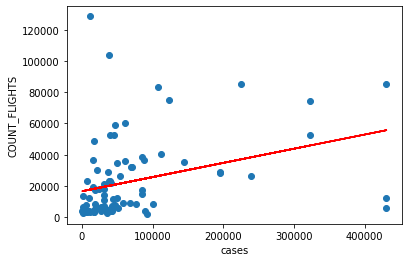

In [91]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.xlabel('cases')
plt.ylabel('COUNT_FLIGHTS')
plt.show()

In [19]:
import statsmodels.api as sm

In [93]:
x = all_grouped_case_airline[['COUNT_FLIGHTS']]
y = all_grouped_case_airline['cases']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model = sm.OLS(y, x).fit()

# Get the p-values for each coefficient
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  cases   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     10.34
Date:                Wed, 03 May 2023   Prob (F-statistic):            0.00185
Time:                        23:25:20   Log-Likelihood:                -1100.9
No. Observations:                  86   AIC:                             2206.
Df Residuals:                      84   BIC:                             2211.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.105e+04   1.29e+04      3.189